<a href="https://colab.research.google.com/github/nanochiplab/Makine_Ogrenmesi/blob/main/Vize_%C3%96devi_Makine_%C3%96%C4%9Frenmesi_Son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #pandas kütüphanesini içe aktarır ve ona pd takma adını atar.
import numpy as  np #numpy kütüphanesini içe aktarır ve ona np takma adını atar
!pip install openpyxl # Excel dosyalarını (.xlsx, .xlsm, .xltx, .xltm) okumak ve
# yazmak için kullanılır
df=pd.read_excel('Dry_Bean_Dataset.xlsx')#pandas kütüphanesini kullanarak "Dry_Bean_Dataset.xlsx" adlı bir Excel dosyasını okur ve içeriğini bir DataFrame'e yükler
df.info() #DataFrame (df) hakkında temel bilgileri görüntüler.
df.isnull().sum() # DataFrame'deki her sütunda bulunan eksik değerlerin (NaN veya boş hücreler) sayısını görüntüler.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [2]:
#%5 ve %35 MISSİNG VALUE İLE DOLDURMA
for col in ['Area', 'Perimeter']: # Bu döngü, 'Area' ve 'Perimeter' sütunları için sırayla işlemler yapar.
    df.loc[df.sample(frac=0.05).index, col] = np.nan # DataFrame'den rastgele %5'lik bir örnek seçer.
    # frac=0.05, örnek oranını belirtir.
    # .index ile satırların indekslerini alır ve for döngüsünde belirtilen sütunlara nan(eksik değer) atar.
df.loc[df.sample(frac=0.35).index, 'ConvexArea'] = np.nan # DataFrame'de 'ConvexArea' sütununa nan(eksik değer) atar.

# index=false ifadesi DataFrame'in indeksinin (satır etiketleri) dışa aktarılan Excel dosyasına dahil edilmemesi gerektiğini belirtir.
df.to_csv("Dry_Bean_Missing_Example.csv", index=False) # DataFrame'i (df) "Dry_Bean_Missing.csv" adlı yeni bir Excel dosyasına kaydeder.
df.isnull().sum() # DataFrame'deki her sütunda bulunan eksik değerlerin (NaN veya boş hücreler) sayısını görüntüler.

,0
Area,681
Perimeter,681
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,4764
EquivDiameter,0
Extent,0
Solidity,0


In [3]:
# Ortalamaları hesapla
ortalama_area = round(df['Area'].mean()) # 'Area' sütununun ortalamasını en yakın tam sayıya yuvarlayarak 'ortalama_area' değişkenine atar
ortalama_perimeter = round(df['Perimeter'].mean(), 3) # 'Perimeter' sütununun ortalamasını virgülden sonra 3 basamağa yuvarlayarak 'ortalama_perimeter' değişkenine atar

# NaN değerlerini ortalama ile doldur
df['Area'] = df['Area'].fillna(ortalama_area) # 'Area' sütunundaki nan değerleri, 'ortalama_area' değerleri ile doldurur.
df['Perimeter'] = df['Perimeter'].fillna(ortalama_perimeter) # 'Perimeter' sütunundaki nan değerleri, 'ortalama_perimeter' değerleri ile doldurur.

df.isnull().sum() # DataFrame'deki her sütunda bulunan eksik değerlerin (NaN veya boş hücreler) sayısını görüntüler.


,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,4764
EquivDiameter,0
Extent,0
Solidity,0


In [4]:
# %35'lik nan içeren ConvexArea satırlarını silme
df = df.dropna(subset=['ConvexArea']) # DataFrame'deki (df) 'ConvexArea' sütununda eksik değer (NaN) içeren tüm satırları siler
df.isnull().sum() # DataFrame'deki her sütunda bulunan eksik değerlerin (NaN veya boş hücreler) sayısını görüntüler.

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [5]:
from scipy import stats # scipy, bilimsel hesaplamalar için kullanılan popüler bir Python kütüphanesidir.
# stats modülü ise, istatistiksel analizler yapmak için çeşitli fonksiyonlar ve araçlar sağlar

def aykiri_degerleri_bul_zscore(df, sutunlar, esik=3): # 'aykiri_degerleri_bul_zscore' adında bir fonksiyon tanımlar.
# df: Fonksiyona girdi olarak verilecek olan DataFrame'dir.
# 'sutunlar', Aykırı değerlerin aranacağı sütunların listesidir.
# esik=3: Z-skoru eşiğidir.Z-skoru mutlak değeri için, bu eşiği aşan değerler, aykırı değer olarak kabul edilir.
    aykiri_indeksler = [] # Aykırı değerlerin indekslerini saklamak için boş bir liste oluşturulur.
    for sutun in sutunlar: # Verilen sütunlar listesindeki her sütun için döngü başlatılır.
        zscores = np.abs(stats.zscore(df[sutun])) # Seçilen sütundaki değerlerin Z-skorları hesaplanır ve mutlak değerleri alınır.
        sutun_aykiri_indeksler = df[zscores > esik].index # Z-skoru değerlerinde, eşiği aşan değerlerin indeksleri bulunur.
        aykiri_indeksler.extend(sutun_aykiri_indeksler) # Bulunan aykırı değer indeksleri ana listeye eklenir.

    aykiri_indeksler = list(set(aykiri_indeksler)) # İndeks listesindeki tekrar eden değerler kaldırılır.
    return aykiri_indeksler # Aykırı değerlerin indekslerini içeren liste döndürülür.

In [6]:
sayisal_sutunlar = df.select_dtypes(include=np.number).columns.tolist() # DataFrame'deki tüm sayısal sütunların isimlerini bulur ve bu isimleri bir liste halinde saklar
# df.select_dtypes(), DataFrame'den belirli veri tiplerine sahip sütunları seçmek için kullanılan bir Pandas fonksiyonudur
# include=np.number, Yalnızca sayısal veri tiplerine sahip sütunların seçilmesini belirtir
# .columns, Seçilen sütunların isimlerini içeren bir Index nesnesi döndürür.
# .tolist(): Index nesnesini bir Python listesine dönüştürür.
print(sayisal_sutunlar) # sayisal_sutunlar listesindeki sütun isimlerini ekrana yazdırır.
print("") # boşluk satır
df.info() # tekrar dataframe bilgisi

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

<class 'pandas.core.frame.DataFrame'>
Index: 8847 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFacto

In [7]:
aykiri_indeksler = aykiri_degerleri_bul_zscore(df, sayisal_sutunlar) # aykiri_degerleri_bul_zscore fonksiyonundan dönen değerleri 'aykiri_indeksler' değişkenine atar
df.loc[aykiri_indeksler]  # Aykırı değerleri içeren satırları görüntüle
df = df.drop(aykiri_indeksler)  # Aykırı değerleri içeren satırları sil
df.info() # DataFrame (df) hakkında temel bilgileri görüntüler

<class 'pandas.core.frame.DataFrame'>
Index: 8121 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8121 non-null   float64
 1   Perimeter        8121 non-null   float64
 2   MajorAxisLength  8121 non-null   float64
 3   MinorAxisLength  8121 non-null   float64
 4   AspectRation     8121 non-null   float64
 5   Eccentricity     8121 non-null   float64
 6   ConvexArea       8121 non-null   float64
 7   EquivDiameter    8121 non-null   float64
 8   Extent           8121 non-null   float64
 9   Solidity         8121 non-null   float64
 10  roundness        8121 non-null   float64
 11  Compactness      8121 non-null   float64
 12  ShapeFactor1     8121 non-null   float64
 13  ShapeFactor2     8121 non-null   float64
 14  ShapeFactor3     8121 non-null   float64
 15  ShapeFactor4     8121 non-null   float64
 16  Class            8121 non-null   object 
dtypes: float64(16), ob

In [8]:
from sklearn.preprocessing import StandardScaler # sklearn.preprocessing modülünden StandardScaler sınıfını içe aktarır.
# StandardScaler, verileri standartlaştırmak (standardize etmek) için kullanılan bir araçtır.
# Standartlaştırma, verilerin ortalamasını 0, standart sapmasını 1 olacak şekilde dönüştürür.

sayisal_sutunlar = df.select_dtypes(include=np.number).drop(columns=['class'], errors='ignore').columns.tolist()
# DataFrame'deki (df) sayısal veri tiplerine sahip sütunları seçer, 'class' adlı sütunu hariç tutar
# ve bu sütunların isimlerini bir liste halinde 'sayisal_sutunlar' değişkenine atar.


scaler = StandardScaler() # StandardScaler nesnesi oluşturuyoruz..

# Verileri ölçeklendireceğiz..
olcekli_veri = scaler.fit_transform(df[sayisal_sutunlar]) # scaler (StandardScaler) nesnesini kullanarak
# DataFrame'deki (df) sayisal_sutunlar listesindeki scaler (StandardScaler) nesnesini kullanarak
# belirtilen sütunlardaki verileri ölçeklendirip, verileri olcekli_veri adlı bir değişkene atayacağız


print(df.head())# Ölçeklendirilmiş verileri görüntülüyoruz..

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   28395.0    610.291       208.178117       173.888747      1.197191   
2   29380.0    624.110       212.826130       175.931143      1.209713   
6   30477.0    670.033       211.050155       184.039050      1.146768   
8   30685.0    635.681       213.534145       183.157146      1.165852   
10  30917.0    640.765       213.560089       184.439871      1.157885   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0       0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
2       0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
6       0.489478     30970.0     196.988633  0.762402  0.984081   0.853080   
8       0.514081     31044.0     197.659696  0.771561  0.988436   0.954240   
10      0.504102     31280.0     198.405512  0.770805  0.988395   0.946258   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0    

In [9]:
from sklearn.preprocessing import LabelEncoder # sklearn.preprocessing modülünden LabelEncoder sınıfını
# içe aktarıyoruz.

etiketle = LabelEncoder()# LabelEncoder ile 'etiketle' nesnesi oluşturduk
sinif_etiketi_sutunu = 'Class' # 'Class' Sınıf etiketlerini içeren sütunu seçiyoruz.

# Sınıf etiketlerini numerik hale getireceğiz..
df[sinif_etiketi_sutunu] = etiketle.fit_transform(df[sinif_etiketi_sutunu])# sınıf etiketlerini içeren
# sütundaki kategorik değerleri (örneğin, 'Seker', 'Barbunya', 'Bombay' gibi), sayısal etiketlere
# (örneğin, 0, 1, 2 gibi) dönüştürür ve bu etiketleri DataFrame'de aynı sütunda saklar.

In [10]:
from sklearn.decomposition import PCA # scikit-learn kütüphanesinin decomposition modülünden PCA sınıfını içe aktarır.
# PCA (Temel Bileşen Analizi), yüksek boyutlu verileri daha düşük boyutlu bir uzaya indirgemek için
# kullanılan bir tekniktir.
import matplotlib.pyplot as plt # matplotlib kütüphanesinin pyplot modülünü plt takma adıyla içe aktarır.

# PCA nesnesi oluşturuyoruz..
pca = PCA()

# Ölçeklendirilmiş verilere PCA uygulayacağız
principal_components = pca.fit_transform(olcekli_veri) # pca (PCA) nesnesini kullanarak ölçeklendirilmiş
# verilerimizi (olcekli_veri), temel bileşenlere dönüştürür ve dönüştürülen verileri principal_components
# adlı bir değişkene atar.

# Varyans oranlarını görüntüleyeceğiz
print(pca.explained_variance_ratio_) # uygulanan PCA işlemi sonucunda her bir temel bileşenin
# varyans oranını ekrana yazdırır.

explained_variance_ratios = pca.explained_variance_ratio_ # PCA nesnesinin explained_variance_ratio_
# özelliğinden dönen değerleri, explained_variance_ratios adlı bir değişkene atar.

[6.01506692e-01 2.25572654e-01 6.77587003e-02 5.40335822e-02
 3.03200307e-02 7.67544252e-03 4.74899402e-03 3.25381207e-03
 3.07746496e-03 1.58162276e-03 4.14960810e-04 4.07171490e-05
 1.04367746e-05 4.69877863e-06 1.32212621e-07 5.85770937e-08]


In [11]:

ortalama_varyans = np.mean(explained_variance_ratios) # Varyans oranlarının ortalamasını hesaplayacağız

# ortalama_varyans'dan büyük olan varyans oranlarının indekslerini bulacağız
bileşen_sayisi = np.where(explained_variance_ratios > ortalama_varyans)[0].shape[0]

X_pca = PCA(n_components=bileşen_sayisi) # PCA sınıfından yeni bir nesne oluşturup ve bu nesneyi X_pca
# adlı bir değişkene atar.Bu yeni PCA nesnesi, belirtilen bileşen_sayisi kadar temel bileşen kullanarak
# boyut indirgeme işlemini gerçekleştirecek şekilde yapılandırılır.

principal_components = X_pca.fit_transform(olcekli_veri)# X_pca (PCA) nesnesini kullanarak ölçeklendirilmiş
# verilerimizi (olcekli_veri), temel bileşenlere dönüştürür ve dönüştürülen verileri principal_components adlı bir
# değişkene atar.

print(X_pca.explained_variance_ratio_)# X_pca adlı PCA nesnesi tarafından hesaplanan ve
# belirtilen sayıda temel bileşenlerin varyans oranlarını ekrana yazdırır

print(np.cumsum(X_pca.explained_variance_ratio_)) # X_pca adlı PCA nesnesi tarafından hesaplanan temel
# bileşenlerin varyans oranlarının kümülatif toplamını ekrana yazdırır.

[0.60150669 0.22557265 0.0677587 ]
[0.60150669 0.82707935 0.89483805]


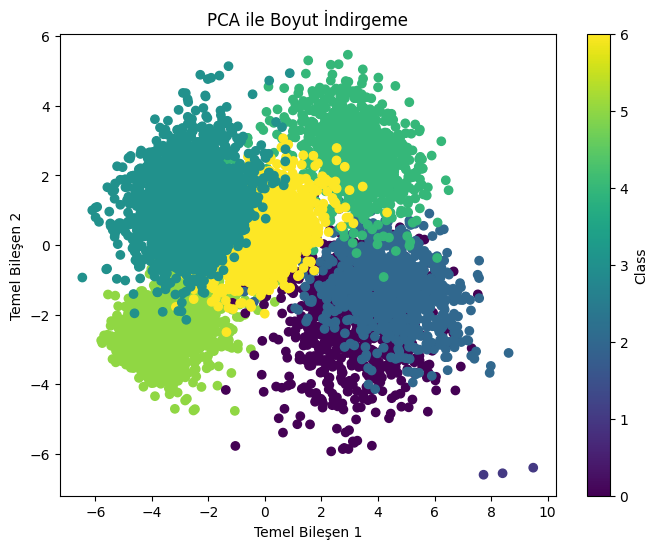

In [12]:
# İlk iki temel bileşeni alacağız
PC1 = principal_components[:, 0] # principal_components adlı değişkenden (ki bu daha önce PCA ile
# dönüştürülen verilerimizi içeriyor) ilk temel bileşenin değerlerini alır ve bu değerleri PC1 adlı
# yeni bir değişkene atar. 0: İlk sütunu (yani, ilk temel bileşeni) seçer.

PC2 = principal_components[:, 1] # ikinci temel bileşenin tüm değerlerini seçip PC2 adlı değişkene atayacağız


sinif_etiketleri = df['Class'] # 'Class' Sınıf etiketlerini alacağız.


plt.figure(figsize=(8, 6))# Grafik oluşturacağız.8x6 inç boyutlarında bir grafik oluşturuyoruz.

plt.scatter(PC1, PC2, c=sinif_etiketleri, cmap='viridis') # PC1, PC2 değerlerini, x ve y eksenlerinde
# kullanacak, sınıf etiketlerine göre renklendirecek ve Renk haritası olarak 'viridis' olacak şekilde
# dağılım grafiği oluşturacağız

plt.xlabel('Temel Bileşen 1') # X eksenine etiket ekleme.
plt.ylabel('Temel Bileşen 2') # y eksenine etiket ekleme.
plt.title('PCA ile Boyut İndirgeme') #  Grafiğe başlık ekleme.
plt.colorbar(label='Class') # Renk çubuğu ekleyip etiketini 'Class' olarak ayarladık.
plt.show() # Grafiği görüntülüyoruz.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # scikit-learn kütüphanesinin
# discriminant_analysis modülünden LinearDiscriminantAnalysis sınıfını
# projemize dahil edip bu sınıfa LDA takma adını veriyoruz.


X_lda = LDA(n_components=3)# LDA nesnesi oluşturup bileşen sayısını 3 olarak belirledik

# Ölçeklendirilmiş verilere ve sınıf etiketlerine LDA uyguluyoruz..
lda_components = X_lda.fit_transform(olcekli_veri, df['Class']) # LDA kullanarak verilerimizi daha düşük
# boyutlu bir uzaya indirger ve sınıflar arasındaki ayrımı maksimize eder. lda_components değişkeni,
# verilerimizin LDA dönüşümü sonucu elde edilen yeni koordinatlarını içerir. Bu yeni koordinatlar,
# sınıflar arasındaki farkları en iyi şekilde vurgulayan doğrusal kombinasyonlardır.

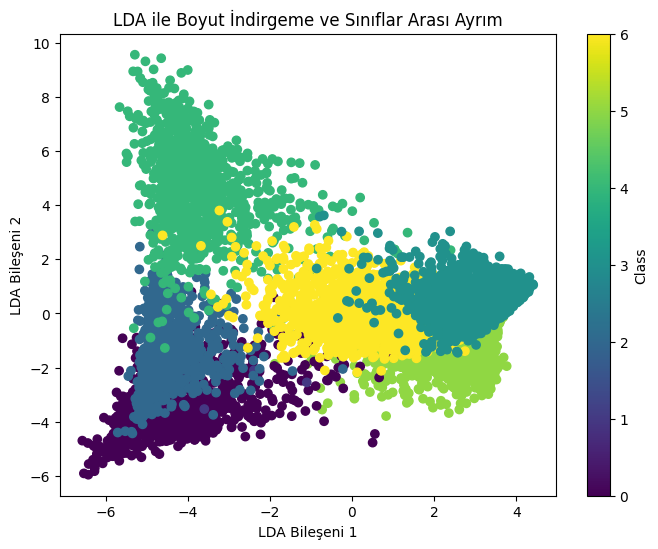

In [14]:
# İlk iki LDA bileşenini alıyoruz..
LDA1 = lda_components[:, 0] # ilk bileşeni alıp LDA1 değişkenine atıyoruz
LDA2 = lda_components[:, 1] # 2. bileşeni alıp LDA2 değişkenine atıyoruz

# Sınıf etiketlerini alın
sinif_etiketleri = df['Class'] # 'Class' Sınıf etiketlerini alacağız.

# Grafik oluşturuyoruz..
plt.figure(figsize=(8, 6)) # 8x6 inç boyutlarında bir grafik oluşturuyoruz.

plt.scatter(LDA1, LDA2, c=sinif_etiketleri, cmap='viridis') # LDA1, LDA2 değerlerini, x ve y eksenlerinde
# kullanacak, sınıf etiketlerine göre renklendirecek ve Renk haritası olarak 'viridis' olacak şekilde
# dağılım grafiği oluşturacağız

plt.xlabel('LDA Bileşeni 1') # X eksenine etiket ekleme.
plt.ylabel('LDA Bileşeni 2') # y eksenine etiket ekleme.
plt.title('LDA ile Boyut İndirgeme ve Sınıflar Arası Ayrım') #  Grafiğe başlık ekleyeceğiz.
plt.colorbar(label='Class') # Renk çubuğu ekleyip etiketini 'Class' olarak ayarladık.
plt.show() # Grafiği görüntülüyoruz.

In [15]:
# LDA1 bileşenini görüntüleyeceğiz
print(X_lda.scalings_[:, 0])  # Öznitelik ağırlıkları

[-1.96317742e-02  4.68535022e-02  5.97707680e+01  1.59957438e+01
 -4.23421728e-01 -7.19392508e+00  2.27113684e+01 -1.00921706e+02
 -6.73238790e-02  3.62249944e-01  4.44909776e-01  7.11928225e+01
 -1.69452423e+00 -1.91569856e+01 -5.29836000e+01  6.21223473e-01]


In [16]:
!pip install xgboost # Python Paket Yöneticisi (pip) kullanarak XGBoost kütüphanesini kurar.
from xgboost import XGBClassifier # XGBoost kütüphanesinden XGBClassifier sınıfını içe aktarır. Birçok
# veri setinde yüksek doğruluk oranlarına sahip sınıflandırma modelleri oluşturmak için kullanılır.
# Gradient boosting algoritmasını kullanarak zayıf öğrenicileri birleştirerek güçlü bir öğrenici oluşturur.
# Bu, modelin karmaşık ilişkileri öğrenmesini ve daha iyi genelleme yapmasını sağlar.

from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
# Bu kod satırı, sklearn.model_selection
# modülünden KFold ve cross_val_score fonksiyonlarını içe aktarır. 'KFold', Veri setimizi K eşit parçaya
# (fold) böler ve çapraz doğrulama (cross-validation) işlemi için kullanılır. 'cross_val_score' belirli
# bir model ve veri seti için çapraz doğrulama skorlarını hesaplar. KFold ile oluşturulan foldları
# kullanarak modeli eğitir ve test eder, ardından her fold için elde edilen skorları döndürür.

from sklearn.linear_model import LogisticRegression # sklearn.linear_model modülünden LogisticRegression
# sınıfını içe aktarır. LogisticRegression, ikili veya çok sınıflı sınıflandırma problemleri için
# kullanılan bir makine öğrenmesi algoritmasıdır. Verileri sigmoid fonksiyonu kullanarak bir olasılık
# değerine dönüştürür ve bu olasılık değerine göre sınıf tahmini yapar.

from sklearn.tree import DecisionTreeClassifier # sklearn.tree modülünden DecisionTreeClassifier sınıfını
# içe aktarır. DecisionTreeClassifier, karar ağaçları kullanarak sınıflandırma yapan bir makine öğrenmesi
# algoritmasıdır. Karar ağaçları, bir dizi karar kuralı kullanarak verileri sınıflandırır. Bu kurallar,
# veri setindeki özniteliklere göre oluşturulur ve ağaç yapısında temsil edilir.

from sklearn.ensemble import RandomForestClassifier # sklearn.ensemble
# modülünden RandomForestClassifier sınıfını içe aktarır.

# RandomForestClassifier: Birden fazla karar ağacını (rastgele orman) kullanarak sınıflandırma yapan bir
# topluluk öğrenme (ensemble learning) yöntemidir. Rastgele ormanlar, her bir ağacın farklı bir veri alt
# kümesi üzerinde eğitilmesi ve tahminlerin çoğunluk oylamasıyla birleştirilmesiyle çalışır. Bu, modelin
# genelleme performansını artırır ve aşırı uyumu (overfitting) önlemeye yardımcı olur.

from sklearn.naive_bayes import GaussianNB  # scikit-learn kütüphanesinden Gaussian
# Naive Bayes sınıflandırıcısını içe aktarır. Gaussian Naive Bayes, verilerin sürekli
# (sayısal) olduğu ve normal dağılım gösterdiği varsayımı altında çalışan bir
# olasılıksal sınıflandırma algoritmasıdır.


In [17]:
# Sınıflandırıcıları bir listede toplayın
#classifiers adlı bir sözlük oluşturulur. Bu sözlük, kullanılacak olan farklı sınıflandırıcıları ve bunların hiperparametrelerini içerir
#Her sınıflandırıcı, bir anahtar (örneğin, 'LogisticRegression') ve bir değer (sınıflandırıcı modeli ve hiperparametrelerini içeren başka bir sözlük) ile temsil edilir.
#Örneğin, 'LogisticRegression' için 'model' anahtarı, LogisticRegression modelini, 'params' anahtarı ise bu model için test edilecek hiperparametreleri içerir.

classifiers = {
'LogisticRegression': {
        'model': LogisticRegression(random_state=12, max_iter=10),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=12),
        'params': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=12),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7]
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(random_state=12),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}


#Adım 2: Veri temsillerini hazırlıyoruz:
# 1. Ham veri
X_raw = df.drop('Class', axis=1) #X_raw, orijinal verilerimizi
# (hedef değişken olan 'Class' sütunu hariç) temsil eder.
y = df['Class'] # y, hedef değişken olan 'Class' sütununu içerir.

# Veri temsillerini bir sözlükte toplayuyoruz
# data_representations adlı bir sözlük oluşturulur. Bu sözlük, farklı veri
# temsillerini (ham veri, PCA dönüştürülmüş veri ve LDA dönüştürülmüş veri)
# anahtar-değer çiftleri olarak içerir.
data_representations = {
    'Ham Veri': X_raw,
    'PCA Dönüştürülmüş Veri': X_pca,
    'LDA Dönüştürülmüş Veri': X_lda
}

In [18]:
import warnings                   # Uyarı mesajları için import ediyoruz.
warnings.filterwarnings('ignore') # Uyarı meajlarını göstermeyeceğiz.Çok yer kaplıyor

# roc_curve, alıcı İşletim Karakteristiği (ROC) eğrisini hesaplar. ROC eğrisi,
# bir ikili sınıflandırıcı sisteminin ayrım eşiği değiştirildikçe teşhis yeteneğini
# gösteren bir grafiktir.

# auc, ROC Eğrisi Altındaki Alanı (AUC) hesaplar. AUC, modelin pozitif ve negatif
# sınıfları ayırt etme yeteneğini temsil eder.

# accuracy_score, Sınıflandırma modelinin doğruluğunu hesaplar. Doğruluk, doğru
# tahmin edilen örneklerin toplam örnek sayısına oranıdır.

# recall_score, Sınıflandırma modelinin geri çağırma
# (duyarlılık veya gerçek pozitif oranı olarak da bilinir) değerini hesaplar.
# Doğru tahmin edilen pozitif gözlemlerin tüm gerçek pozitiflere
# oranıdır

# precision_score, Sınıflandırma modelinin kesinliğini hesaplar. Kesinlik,
# doğru tahmin edilen pozitif gözlemlerin toplam tahmin edilen pozitiflere oranıdır.

# f1_score, Precision ve Recall'ın harmonik ortalaması olan F1 skorunu hesaplar.
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# KFold, verisetini K eşit parçaya (fold) böler ve çapraz doğrulama
# (cross-validation) işlemi için kullanılır.
from sklearn.model_selection import KFold

# sklearn.preprocessing modülünden label_binarize fonksiyonunu içe aktarır.
# Bu fonksiyon, çoklu sınıf etiketlerini ikili formata dönüştürmek için kullanılır,
# özellikle çok sınıflı sınıflandırma problemlerinde "bir-karşı-diğerleri"
# (One-vs-Rest) veya "bir-karşı-bir" (One-vs-One) stratejileri uygulanırken faydalıdır.
from sklearn.preprocessing import label_binarize

# sklearn.multiclass modülünden OneVsRestClassifier sınıfını içe aktarır.
# OneVsRestClassifier, çoklu sınıf sınıflandırma problemlerini çözmek için
# kullanılan bir stratejidir. Bu strateji, her sınıfı diğer tüm sınıflara karşı
# eğiterek birden fazla ikili sınıflandırıcı oluşturur
from sklearn.multiclass import OneVsRestClassifier  # OneVsRestClassifier eklendi

import matplotlib.pyplot as plt # matplotlib kütüphanesinin pyplot modülünü plt
# takma adıyla içe aktarır. matplotlib, Python'da statik, interaktif ve animasyonlu
# görselleştirmeler oluşturmak için kullanılan bir kütüphanedir.

# ... (Veri yükleme, ön işleme ve model tanımları) ...

# sklearn.model_selection modülünden içe aktarılan KFold sınıfını kullanarak
# out_cv ve in_cv adında bir çapraz doğrulama (cross-validation) nesnesi oluşturur.
# out_cv'yi, dış döngüden verileri 5 parçaya (fold), in_cv'yi ise iç döngüde 3
# parçaya bölmek için kullanacağız
out_cv = KFold(n_splits=5, shuffle=True, random_state=42)  # CV nesnesi
in_cv = KFold(n_splits=3, shuffle=True, random_state=42)  # CV nesnesi

results = [] # results adında boş bir liste oluşturur. Bu liste, daha sonra makine
# öğrenimi modellerinin performans metriklerini depolamak için kullanılacaktır.
best_models = {}  # Her veri temsili için en iyi modelleri saklayacağız

for data_name, X in data_representations.items(): # data_representations
# sözlüğündeki her bir öğe üzerinde döngü oluşturur
    for classifier_name, classifier_data in classifiers.items():
      # classifiers sözlüğündeki her bir öğe üzerinde döngü oluşturur.
        classifier = classifier_data['model'] # classifier_data sözlüğünden 'model'
        # anahtarına karşılık gelen değeri alır ve bunu classifier değişkenine atar
        params = classifier_data.get('params') # classifier_data sözlüğünden
        # 'params' anahtarına karşılık gelen değeri alır ve bunu params
        # değişkenine atar

        model_name = type(classifier).__name__ # Modelin adını alıyoruz

        # Metrikleri depolamak için 4 adet liste açacağız
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Veri temsiline göre bölme yapacağız...PCA,LDA veya ham veri
        if data_name == 'PCA Dönüştürülmüş Veri':
            data_to_split = principal_components  # PCA için principal_components
        elif data_name == 'LDA Dönüştürülmüş Veri':
            data_to_split = lda_components  # LDA için lda_components
        else:
            data_to_split = X  # Diğer temsiller için orijinal veriler

        for train_index, test_index in out_cv.split(data_to_split):
          # out_cv nesnesi tarafından belirlenen çapraz doğrulama stratejisine
          # göre data_to_split verilerini eğitim ve test kümelerine bölmek için
          # bir döngü oluşturur
            # Veri temsili PCA veya LDA ise, dönüştürülmüş verileri alalım
            if data_name == 'PCA Dönüştürülmüş Veri':
                X_train, X_test = principal_components[train_index], principal_components[test_index]
            elif data_name == 'LDA Dönüştürülmüş Veri':
                X_train, X_test = lda_components[train_index], lda_components[test_index]
            else: # değilse ham veri
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]

            # hedef değişken verilerini (y) eğitim ve test kümelerine ayırır.
            # train_index ve test_index, daha önce çapraz doğrulama işlemi
            # sırasında oluşturulan eğitim ve test verilerinin indekslerini içerir
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # En iyi hiperparametreleri bulacağız. RandomizedSearchCV'ı, hiperparametre aralığı
            # (params) için rastgele arama (random search) yaparak en iyi
            # hiperparametreleri bulmak için kullanacağız
            random_search = RandomizedSearchCV(classifier, params,
                                               n_iter=10, cv=in_cv, scoring='accuracy',
                                               random_state=42)

            random_search.fit(X_train, y_train) # daha önce oluşturulan
            # random_search nesnesini kullanarak eğitim verileri (X_train, y_train)
            #  üzerinde hiperparametre optimizasyonu gerçekleştireceğiz


            # En iyi modeli alıp ve tahmin yapacağız.random_search nesnesinin
            # best_estimator_ özelliğinden en iyi performans gösteren tahmin
            # ediciyi (estimator) alır ve bunu best_model değişkenine atar.
            best_model = random_search.best_estimator_

            # Yukarıda eğitilmiş best_model kullanarak test verileri (X_test)
            # üzerinde tahminler yapar ve bu tahminleri y_pred değişkenine atar
            y_pred = best_model.predict(X_test)

            # 4 farklı metriğin skorlarını ilgili listelerine ekleyeceğiz.
            # Daha önceden buisteleri tanımlamıştık. average='weighted' parametresi
            # çok sınıflı sınıflandırma durumunda ağırlıklı ortalama hesaplamak içindir.
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
            recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


        # Ortalama ve standart sapmayı hesaplayacağız. Modelin performans
        # metriklerini ve ilgili istatistiklerini (ortalama ve standart sapma)
        # results listesine ekler.
        results.append([data_name, model_name,
                        np.mean(accuracy_scores), np.std(accuracy_scores),
                        np.mean(precision_scores), np.std(precision_scores),
                        np.mean(recall_scores), np.std(recall_scores),
                        np.mean(f1_scores), np.std(f1_scores)])

        # Ortalama doğruluğa göre en iyi modeli saklayacağız
        avg_accuracy = np.mean(accuracy_scores) # accuracy_scores listesindeki
        # doğruluk skorlarının ortalamasını hesaplar ve bu ortalamayı avg_accuracy
        # değişkenine atar.

        # Belirli bir veri temsili (data_name) için en iyi modeli (best_model)
        # günceller. Eğer data_name daha önce best_models sözlüğünde yoksa veya
        # mevcut en iyi modelin doğruluğundan (best_models[data_name][1]) daha
        # yüksek bir ortalama doğruluk (avg_accuracy) elde edilirse, best_models
        # sözlüğü güncellenir ve yeni en iyi model olarak classifier atanır
        if data_name not in best_models or avg_accuracy > best_models[data_name][1]:
            best_models[data_name] = (classifier, avg_accuracy)

# Sonuçları DataFrame'e dönüştürüp ve görüntüleyeceğiz.
# results listesinde saklanan verileri kullanarak bir Pandas DataFrame'i
# (results_df) oluşturacağız. results listesindeki her bir öğeyi DataFrame'in bir satırı
# olarak ekleyip ve sütun adlarını belirtilen liste kullanarak ayarlacağız
results_df = pd.DataFrame(results, columns=['Veri Temsili', 'Model',
                                           'Ortalama Accuracy', 'Standart Sapma Accuracy',
                                           'Ortalama Precision', 'Standart Sapma Precision',
                                           'Ortalama Recall', 'Standart Sapma Recall',
                                           'Ortalama F1-score', 'Standart Sapma F1-score'])
print(results_df) # Dataframe'i yazdıracağız



              Veri Temsili                   Model  Ortalama Accuracy  \
0                 Ham Veri      LogisticRegression           0.186057   
1                 Ham Veri              GaussianNB           0.769609   
2                 Ham Veri  DecisionTreeClassifier           0.905184   
3                 Ham Veri  RandomForestClassifier           0.911218   
4                 Ham Veri           XGBClassifier           0.918730   
5   PCA Dönüştürülmüş Veri      LogisticRegression           0.874276   
6   PCA Dönüştürülmüş Veri              GaussianNB           0.868242   
7   PCA Dönüştürülmüş Veri  DecisionTreeClassifier           0.858515   
8   PCA Dönüştürülmüş Veri  RandomForestClassifier           0.874893   
9   PCA Dönüştürülmüş Veri           XGBClassifier           0.873784   
10  LDA Dönüştürülmüş Veri      LogisticRegression           0.890654   
11  LDA Dönüştürülmüş Veri              GaussianNB           0.888684   
12  LDA Dönüştürülmüş Veri  DecisionTreeClassifier 

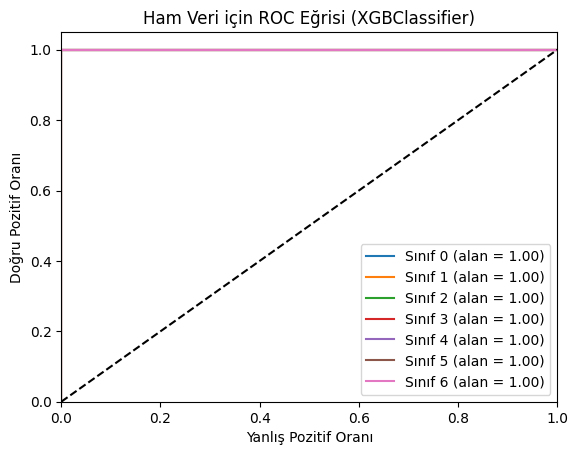

Ham Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


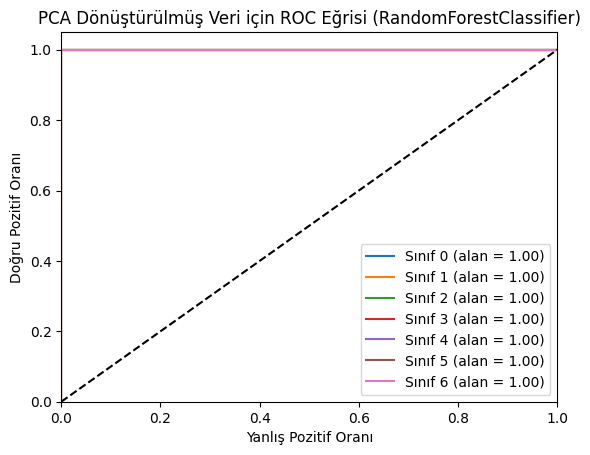

PCA Dönüştürülmüş Veri için ROC-AUC Skorları (RandomForestClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


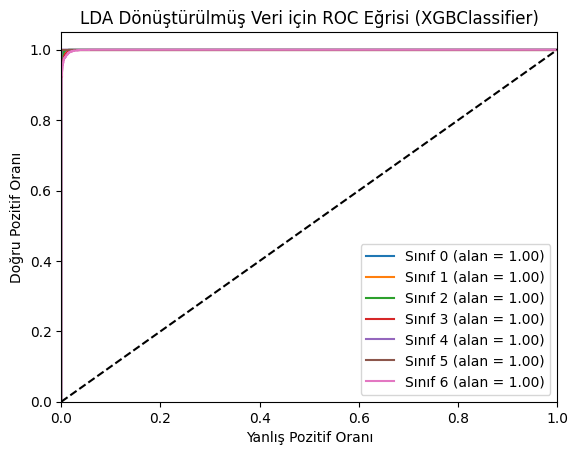

LDA Dönüştürülmüş Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


In [19]:
# best_models sözlüğünde dolaşarak her veri türü için en iyi modeli ve ilgili veri
# temsilini alır. Bu modellerin daha sonraki analizleri veya görselleştirilmeleri
# için hazırlık yapar.
for data_name, (best_model, _) in best_models.items():
    X = data_representations[data_name]

    # PCA veya LDA ise dönüştürülmüş verileri kullanacağız
    if data_name == 'PCA Dönüştürülmüş Veri':
        X = principal_components
    elif data_name == 'LDA Dönüştürülmüş Veri':
        X = lda_components

    # Modelin predict_proba özelliği olup olmadığını kontrol edeceğiz.
    # en iyi modelin türüne bağlı olarak ROC eğrisi hesaplaması için gereken
    # skorları elde eder
    if hasattr(best_model, 'predict_proba'): # best_model nesnesinin predict_proba
    # metoduna sahip olup olmadığını kontrol eder. Bu metod, bir örneğin her bir
    # sınıfa ait olma olasılığını tahmin etmek için kullanılır.
        y_score = best_model.fit(X, y).predict_proba(X)  # Olasılık tahminleri
    else:
        # predict_proba yoksa, bu model için decision_function metodunu kullanarak
        # olasılık benzeri skorlar elde edeceğiz
        y_score = best_model.fit(X, y).decision_function(X)

    # Çıktıyı ikili hale getireceğiz
    y_bin = label_binarize(y, classes=np.unique(y)) # label_binarize fonksiyonu,
    # sklearn.preprocessing modülünden içe aktarılır ve çok sınıflı hedef
    # değişkenini ikili formata dönüştürmek için kullanılır.
    # classes=np.unique(y), dönüştürülecek sınıf etiketlerini belirtir.
    # np.unique(y) ile hedef değişkendeki benzersiz sınıflar bulunur ve bu sınıflar
    # için ikili gösterim oluşturulur.

    n_classes = y_bin.shape[1] # y_bin değişkeninin ikinci boyutunu
    # (sütun sayısını) döndürür. Bu, ikili formata dönüştürüldükten sonraki
    # sınıf sayısını temsil eder.

    # Her sınıf için ROC eğrisini ve ROC alanını hesaplayacağız
    fpr = dict() # fpr adında boş bir sözlük oluşturur. Bu sözlük daha sonra her
    # sınıf için yanlış pozitif oranlarını (False Positive Rate) depolamak için
    # kullanılacaktır.

    tpr = dict() # tpr adında boş bir sözlük oluşturur. Her sınıf için Doğru Pozitif
    # oranlarını (True Positive Rate - TPR) depolamak için kullanılacaktır.

    roc_auc = dict() # roc_auc adında boş bir sözlük oluşturur. Her bir sınıf için
    # ROC Eğrisi Altındaki Alan (Area Under the ROC Curve - AUC) değerlerini
    # depolamak için kullanılacaktır

    # Her sınıf için ROC eğrisini ve ROC eğrisi altındaki alanı (AUC) hesaplar.
    # Daha önce oluşturulan fpr, tpr ve roc_auc sözlüklerini kullanarak, her sınıf
    # için bu değerleri depolar.
    for i in range(n_classes): # toplam sınıf sayısı (n_classes) kadar tekrar eder,
    # yani her sınıf için bir işlem gerçekleştirilir.

    # roc_curve fonksiyonu, sklearn.metrics modülünden içe aktarılır ve ROC eğrisini hesaplamak için kullanılır.
    # y_bin[:, i] : i sınıfına ait gerçek etiketlerin ikili (binarize edilmiş) hali.
    # y_score[:, i] : i sınıfına ait modelin tahmin skorları.
    # Fonksiyonun çıktısı olarak yanlış pozitif oranları (fpr), doğru pozitif
    # oranları (tpr) ve eşik değerleri (burada _ ile gösterilip kullanılmıyor)
    # döndürülür.
    # fpr[i], tpr[i] : Hesaplanan FPR ve TPR değerleri, ilgili sınıfa ait (i)
    # anahtar kullanılarak sözlüklere atanır.
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Her sınıf için ROC eğrilerini çizeceğiz
    plt.figure() # Yeni bir grafik penceresi oluşturur.
    for i in range(n_classes): # Her sınıf için döngü oluşturur.
        plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (alan = {roc_auc[i]:.2f})') # Her sınıf için ROC eğrisini çizer
    plt.plot([0, 1], [0, 1], 'k--') # Rastgele sınıflandırıcıyı temsil eden bir çizgi çizer (köşegen)
    plt.xlim([0.0, 1.0])  # Grafiğin x ve
    plt.ylim([0.0, 1.05]) #  y eksenlerinin sınırlarını ayarlar.
    plt.xlabel('Yanlış Pozitif Oranı') # Grafiğin eksenlerine ve başlığına etiket
    plt.ylabel('Doğru Pozitif Oranı')  # ekler. Başlıkta veri temsilinin adı ve
    # modelin türü belirtilir.
    plt.title(f'{data_name} için ROC Eğrisi ({type(best_model).__name__})')
    plt.legend(loc="lower right") # Eğri etiketlerini gösteren bir açıklama kutusu
    # ekler.
    plt.show() # Grafiği görüntüler.

    # ROC-AUC skorlarını yazdıracağız
    # veri temsilinin adını (data_name), en iyi modelin türünü
    # (type(best_model).__name__) ve "ROC-AUC Skorları" metnini içeren bir başlık
    # yazdırır.
    print(f"{data_name} için ROC-AUC Skorları ({type(best_model).__name__}):")

    # Toplam sınıf sayısı (n_classes) kadar tekrar eder, yani her sınıf için bir
    # işlem gerçekleştirilir.
    for i in range(n_classes):
        print(f"Sınıf {i}: {roc_auc[i]:.2f}") # her sınıf için sınıf numarasını (i)
        # ve ROC-AUC skorunu (roc_auc[i]) yazdırır. :.2f format belirteci,
        # AUC skorunun ondalık basamaktan sonra iki basamak olarak yazdırılmasını
        # sağlar.